## Problem 20

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [42]:
def create_A_b(n):
    A = np.zeros((n,n))
    b = np.empty((n,1))
   
    for i in range(len(A)):
        A[i,i] = 2.01   # i=j

        for j in range(len(A)):
            if(i == j+1):
                A[i,j] = -1
            if(i == j-1):
                A[i,j] = -1

    # b creation
        b[i][0] = (1/100)*(math.sin(2*i*math.pi/50.0))   
    return A,b


def create_xnot(n):
    np.random.seed(450) #setting seed to get same initial x values
    x = np.zeros((n,1))
    for i in range(n):
        x[i] = ((-1)**np.random.randint(2,size=1)[0])*np.random.rand(1)
    return x


### A)

In [43]:
def get_B_UDL(A):
    n = len(A)
    U = np.zeros((n,n))
    D = np.zeros((n,n))
    L = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if(i==j):
                D[i,j] = A[i,j]
            elif(i>j):
                L[i,j] = A[i,j]
            else: #i<j
                U[i,j] = A[i,j]
        
    B = np.linalg.inv(D+L)

    return B,U,D,L

def gauss_seidel(A,b):
    BUDL = get_B_UDL(A)
    B = BUDL[0]
    U = BUDL[1]
    x = create_xnot(len(A))    #initial x
    k_steps = 201     #number of iterations
    kplot = np.array([0,2,5,10,20,50,100,200])
    colorMe = np.array(['blue','green','red','yellow','black','orange','pink','purple'])

    fig, ax = plt.subplots(1,1)

    ax.scatter(np.arange(len(x)),x[np.arange(len(x))],color = colorMe[np.where(kplot == 0)[0][0]])


    for k in range(1,k_steps):
        #xk = B(-U * xk-1 + b)
        x_new = np.matmul(B,np.matmul((-1)*U,x)+b)
        x = np.copy(x_new)
      
        

        if(len(np.where(kplot == k)[0]) > 0):
            for i in range(len(A)):
                ax.scatter(i,x[i],color = colorMe[np.where(kplot == k)[0][0]])


    plt.xlabel('i')
    plt.ylabel('(x^(k))i')
    plt.title('Gauss-Siedel xki\'s against i\'s for k=[0,2,5,10,20,50,100,200] \n with corresponding colors [\'blue\',\'green\',\'red\',\'yellow\',\'black\',\'orange\',\'pink\',\'purple\']')


    plt.show()

    



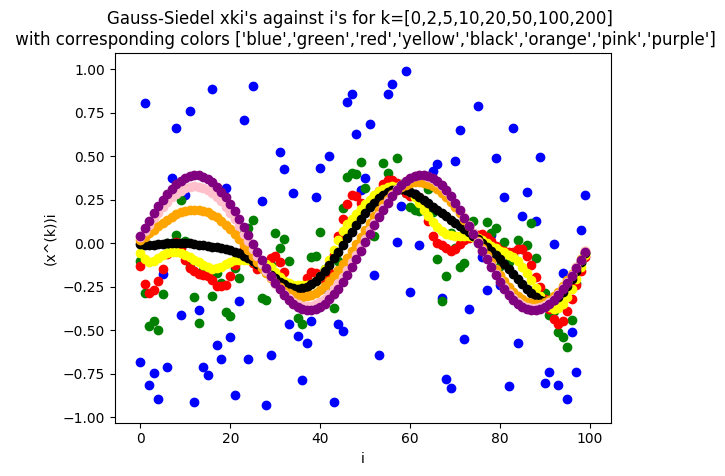

In [44]:
Ab = create_A_b(100)
gauss_seidel(Ab[0],Ab[1])


### B)

In [45]:
def scalarProduct(x,y):
    
    x.reshape((1,len(x)))
    y.reshape((1,len(x)))
    #print()
    #print(x)
    #print(y)
    #print(np.vdot(x,y))

    return np.vdot(x,y)

def steepest_descent(A,b):
    x = create_xnot(len(A))    #initial x
    k_steps = 201     #number of iterations
    kplot = np.array([0,2,5,10,20,50,100,200])
    colorMe = np.array(['blue','green','red','yellow','black','orange','pink','purple'])

    fig, ax = plt.subplots(1,1)

    ax.scatter(np.arange(len(x)),x[np.arange(len(x))],color = colorMe[np.where(kplot == 0)[0][0]])

    for k in range(1,k_steps):
        v = b - np.matmul(A,x)
        t = scalarProduct(v,0.5*v) / scalarProduct(v, np.matmul(A,v))
        x_new = x + t*v
        x = np.copy(x_new)

        if(len(np.where(kplot == k)[0]) > 0):
            for i in range(len(A)):
                ax.scatter(i,x[i],color = colorMe[np.where(kplot == k)[0][0]])


    plt.xlabel('i')
    plt.ylabel('(x^(k))i')
    plt.title('Steepest Descent xki\'s against i\'s for k=[0,2,5,10,20,50,100,200] \n with corresponding colors [\'blue\',\'green\',\'red\',\'yellow\',\'black\',\'orange\',\'pink\',\'purple\']')


    plt.show()

        

    

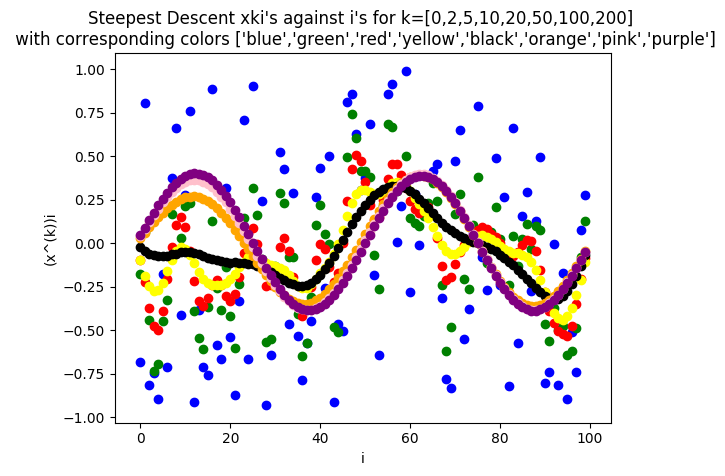

In [46]:
Ab = create_A_b(100)
steepest_descent(Ab[0],Ab[1])

### C)

If you look at the two graphs for Gauss-Seidel method and steepest descent method we can see that the initial $(x^{k})_{i}s$ in blue are the same as I set a seed in the initilization of $x_{0}$ to better see the differences between these two methods. When looking at the progression over the iterations we can see that the steepest descent method seems to have much more variability from the purple values which are at k=200 and thus the most accurate we got using the method. This increassed variability compared to the Gauss-Seidel method is pretty clear until we get to the black dots around k=20. After that it is difficult to determine the differences between the two methods and in the end they seem to produce the same results.

It seems to me that compared to Problem 16 both the Gauss-Seidel method and the steepest descent method perform slightly better, however, the jacobi method doesn't seem to be too far behind. Hopefully I did the jacobi method right in the previous homework, however, I am not sure because it hasn't been returned quite yet so I do not want to comment too much on something that could be wrong.